<a href="https://colab.research.google.com/github/lazybuttrying/AI_Project/blob/main/leaf_segmentation/image_matching/feature_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

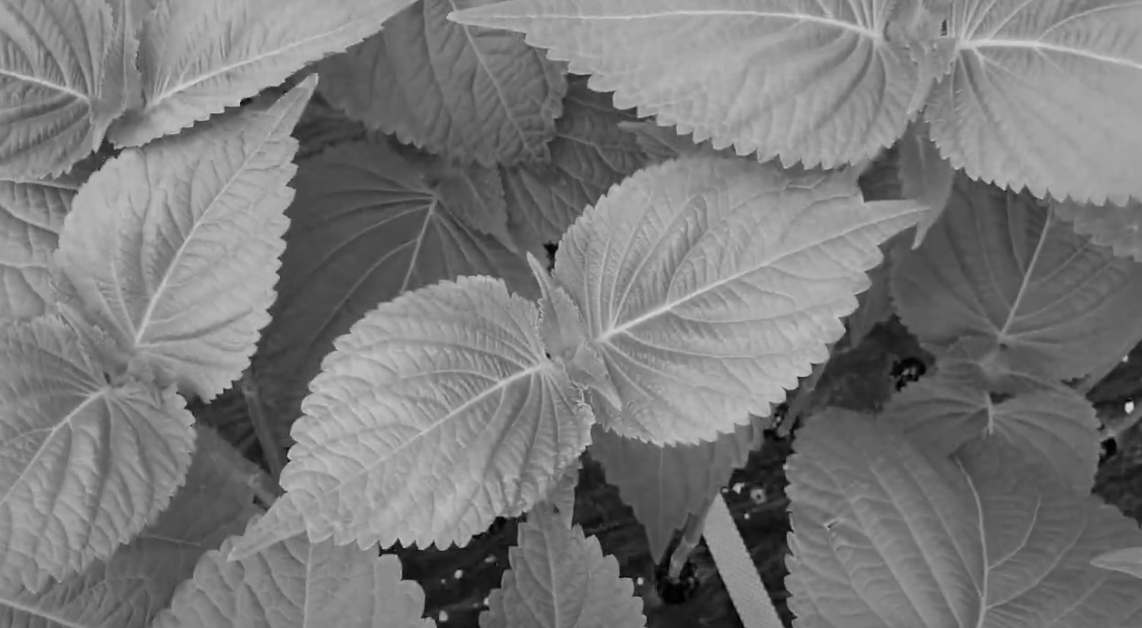

In [8]:
img = cv2.imread("leaf.png", cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

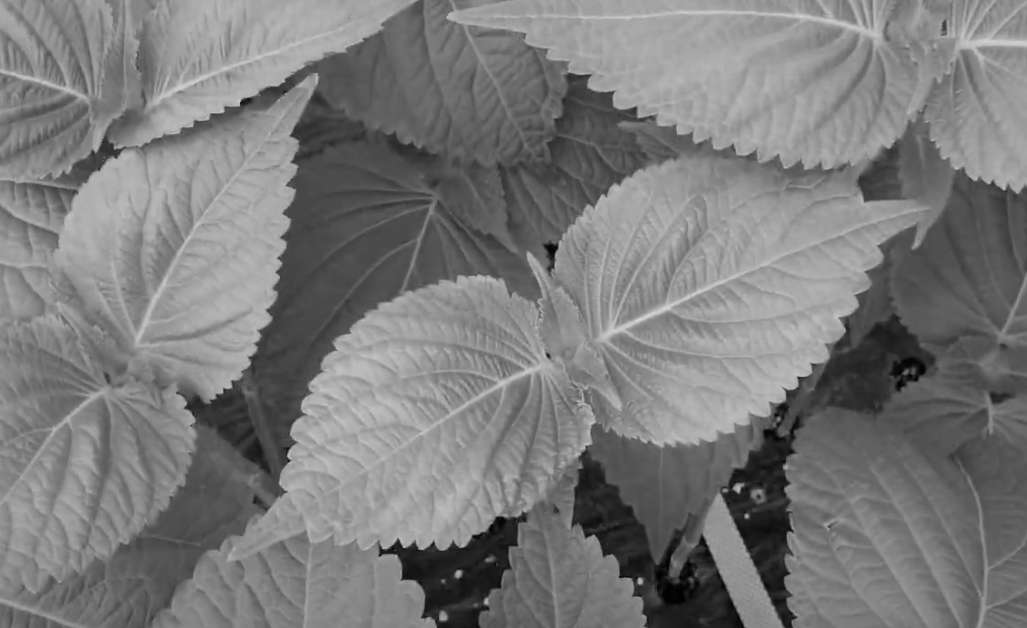

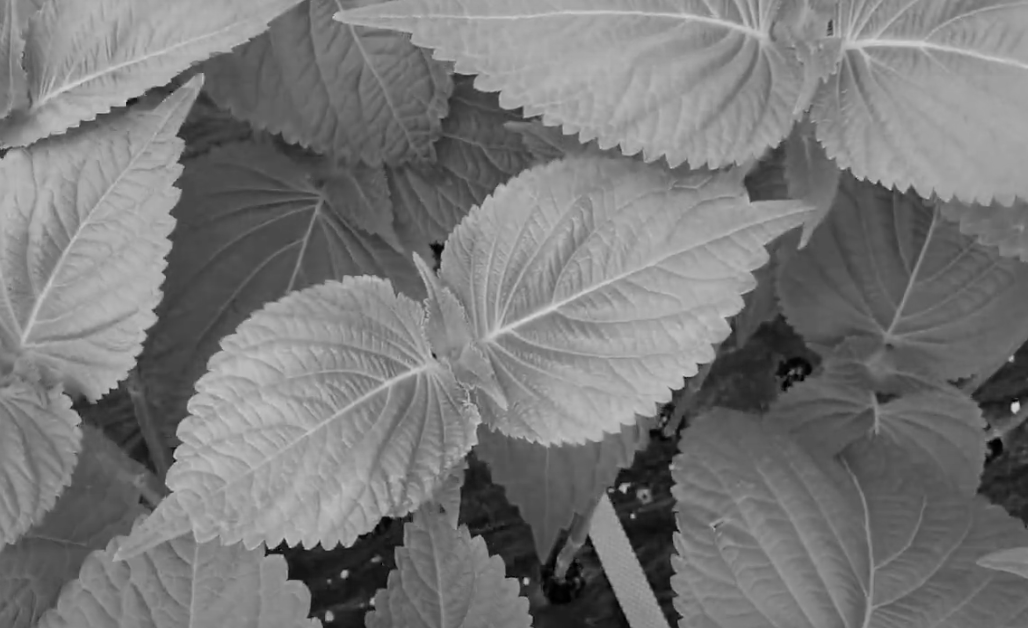

In [12]:
# h, w, c = img.shape
# img_left = img[:,:int(w*9//10),:]
# img_right = img[:,w//10:,:]

h, w = img.shape
img_left = img[:,:int(w*9//10)]
img_right = img[:,w//10:]

cv2_imshow(img_left)
cv2_imshow(img_right)

441


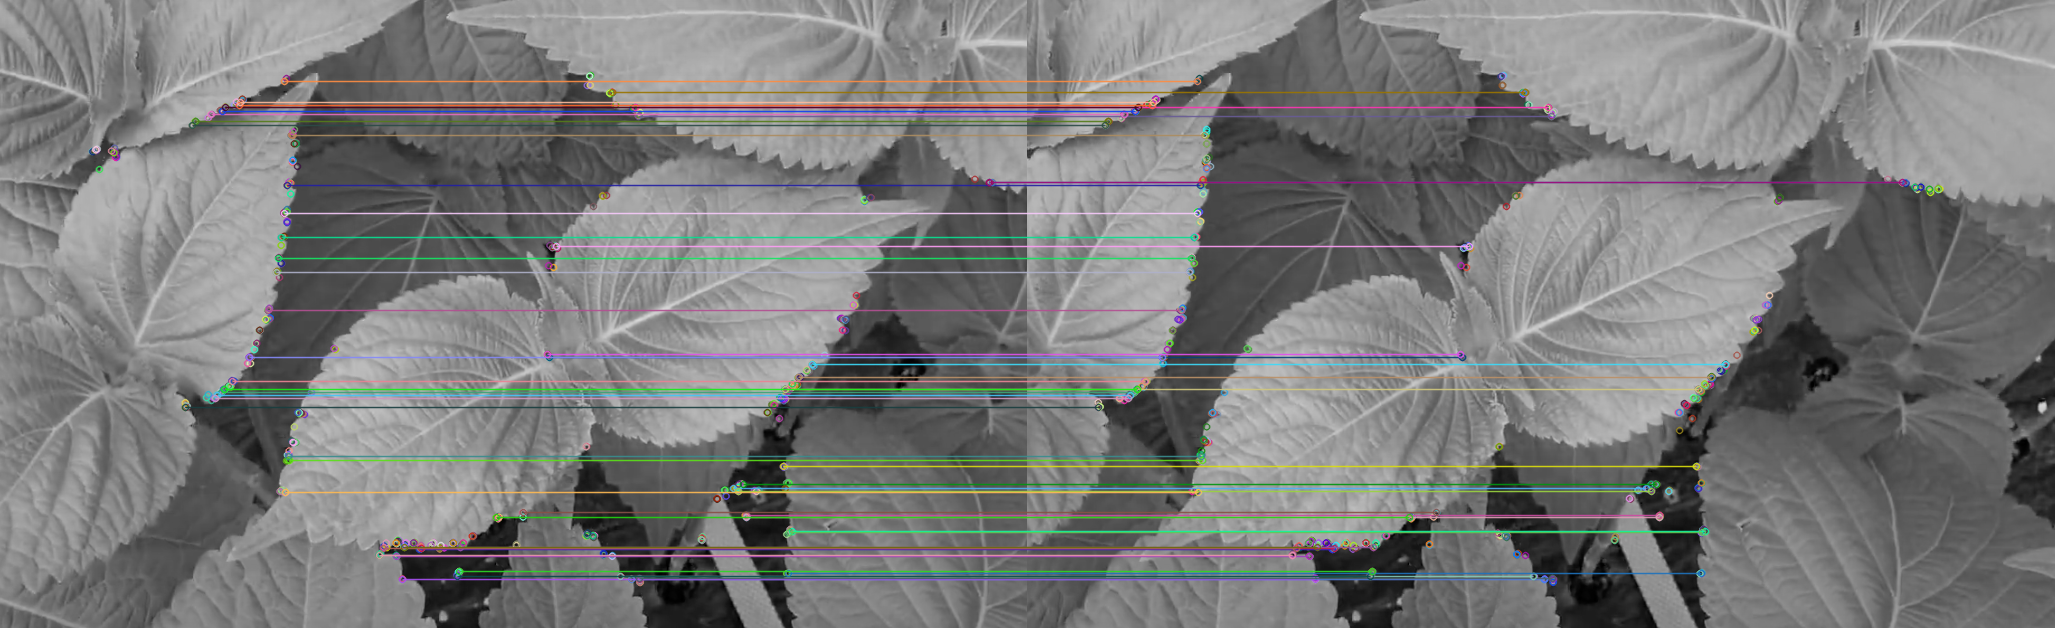

In [21]:
# https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img_left, None)
kp2, des2 = orb.detectAndCompute(img_right, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

matches = sorted(matches, key=lambda x: x.distance)
print(len(matches))
result = cv2.drawMatches(img_left, kp1, img_right, kp2, 
                         matches[:60], None, flags=0)

cv2_imshow(result)

159


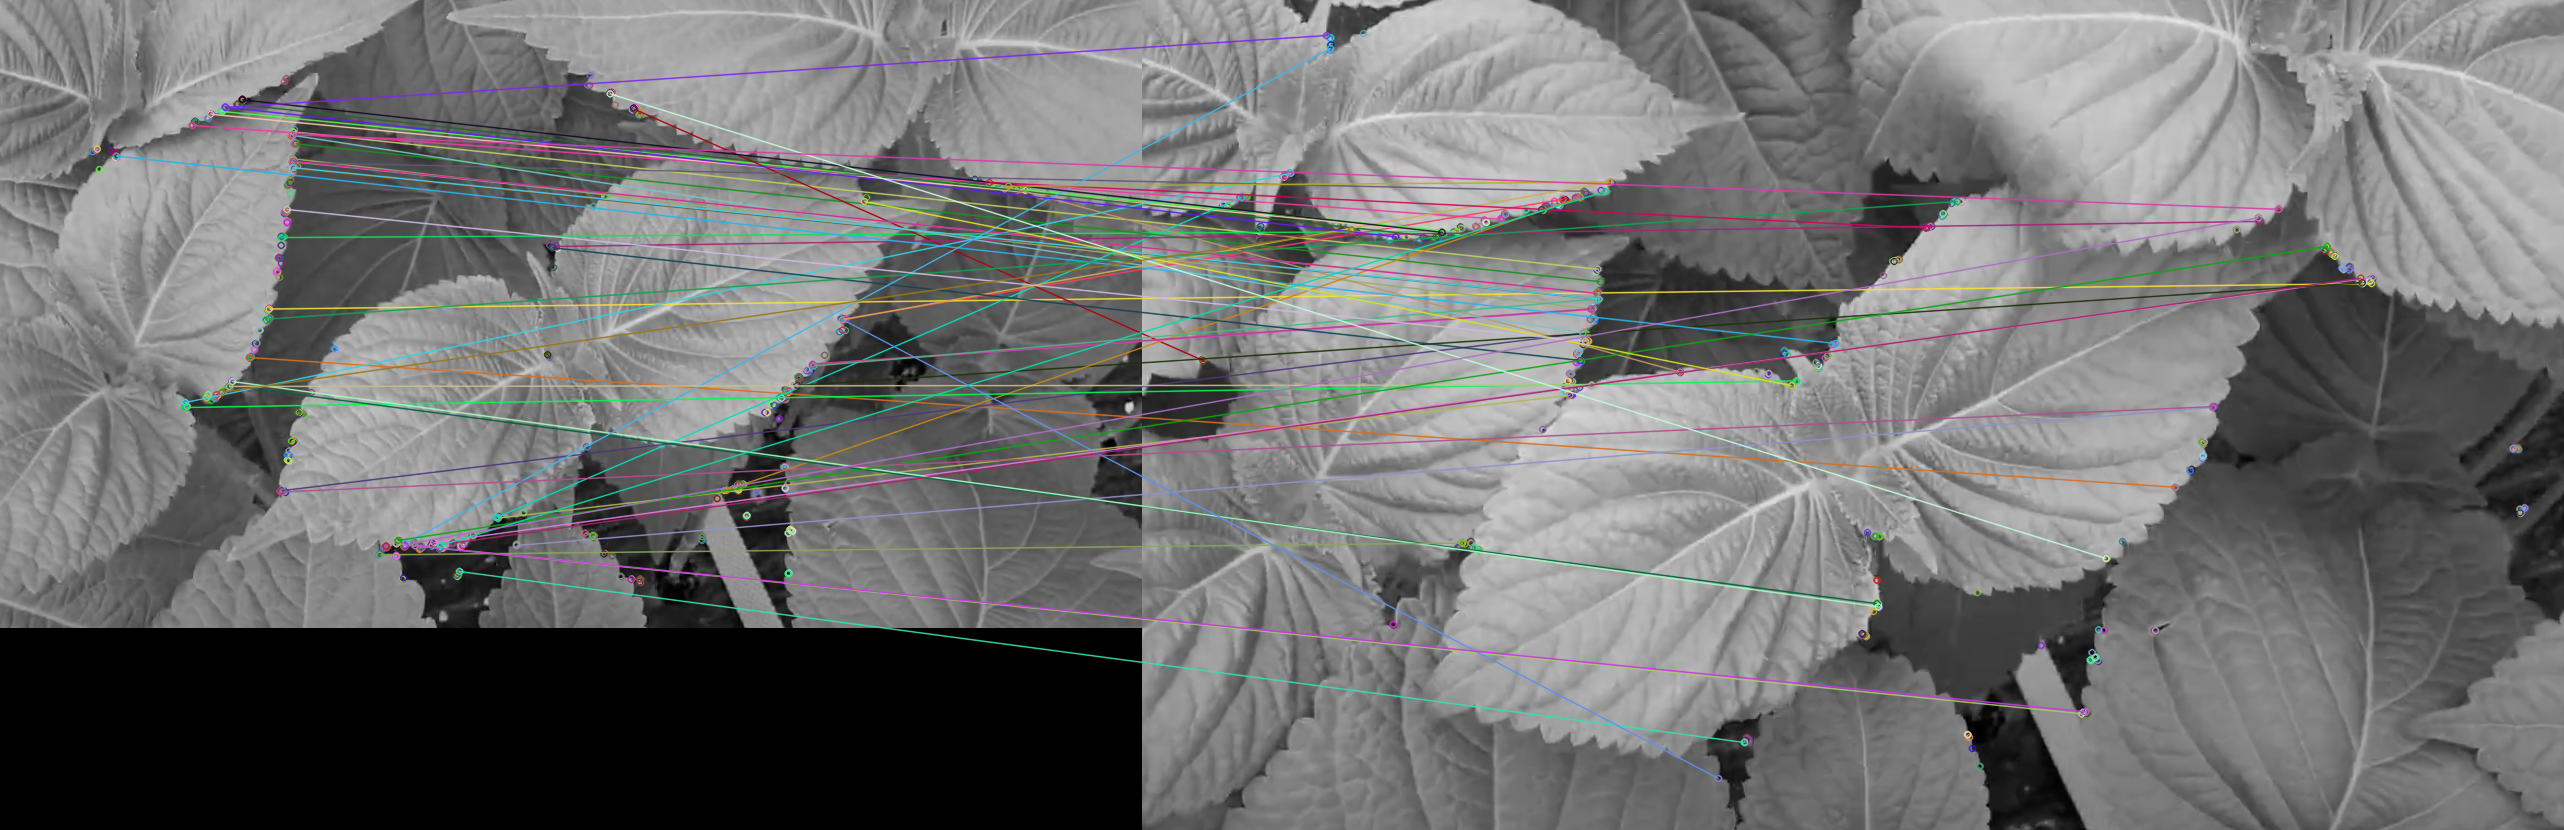

In [20]:
img_another = cv2.imread("leaf2.png", cv2.IMREAD_GRAYSCALE)

# https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img, None)
kp2, des2 = orb.detectAndCompute(img_another, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

matches = sorted(matches, key=lambda x: x.distance)
print(len(matches))
result = cv2.drawMatches(img, kp1, img_another, kp2, 
                         matches[:60], None, flags=0)

cv2_imshow(result)